In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
NUM_SAMPLES = 1000
centers = np.random.uniform(size=(NUM_SAMPLES, 2))
mean = np.array([0, 0])
r = 0.1
cov = np.array([
    [r, 0],
    [0, r]
])
# samples = centers + np.random.multivariate_normal(mean, cov, NUM_SAMPLES)
samples = centers + np.random.uniform(-r, r, (NUM_SAMPLES, 2))

In [114]:
import seaborn as sns
import pandas as pd
samples = pd.DataFrame(samples)
samples = samples.rename(columns={0 : 'x', 1 : 'y'})

In [115]:
samples

,x,y
0,0.516341,0.405273
1,0.495524,0.321548
2,0.698565,0.959499
3,0.627808,0.011078
4,0.617513,0.583237
...,...,...
995,0.880557,0.381890
996,0.014457,0.694647
997,0.420443,0.550837
998,0.888268,0.839617


In [116]:
samples['inside'] = (samples['x'] > 0) & (samples['x'] < 1) & (samples['y'] > 0) & (samples['y'] < 1)
samples

,x,y,inside
0,0.516341,0.405273,True
1,0.495524,0.321548,True
2,0.698565,0.959499,True
3,0.627808,0.011078,True
4,0.617513,0.583237,True
...,...,...,...
995,0.880557,0.381890,True
996,0.014457,0.694647,True
997,0.420443,0.550837,True
998,0.888268,0.839617,True


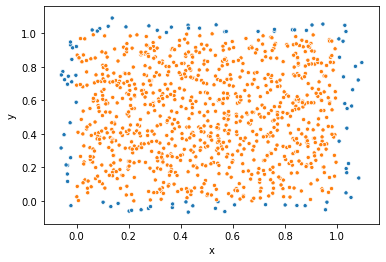

In [117]:
sns.scatterplot(x='x', y='y', data=samples, hue='inside', size=0.001, legend=False)

In [50]:
samples['inside'].sum() / samples.shape[0]

0.553

In [71]:
fraction[20]

0.6992

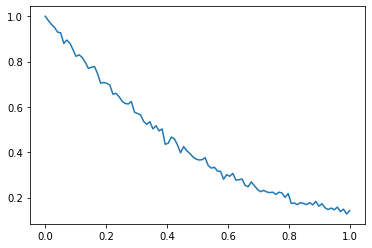

In [118]:
fraction = []
stds = np.linspace(0, 1, 100)
for std in stds:
    centers = np.random.uniform(size=(NUM_SAMPLES, 2))
    mean = np.array([0, 0])
    r = std ** 2
    cov = np.array([
        [r, 0],
        [0, r]
    ])
    samples = centers + np.random.multivariate_normal(mean, cov, NUM_SAMPLES)
#     samples = centers + np.random.uniform(-r, r, (NUM_SAMPLES, 2))
    samples = pd.DataFrame(samples)
    samples = samples.rename(columns={0 : 'x', 1 : 'y'})
    samples['inside'] = (samples['x'] > 0) & (samples['x'] < 1) & (samples['y'] > 0) & (samples['y'] < 1)
    fraction.append(samples['inside'].sum() / NUM_SAMPLES)
plt.plot(stds, fraction)

## Moire Trapping

In [192]:
escape_rate

array([0.68798825, 0.6291594 , 0.59368393, ..., 0.56044311, 0.59268487,
       0.75205468])

In [221]:
escape_rate

array([0.27887937, 0.05011954, 0.04837767, ..., 0.41122829, 0.38383041,
       0.49783316])

In [195]:
N = int(1e5)
potentials = Z
T = (np.amax(Z) -  np.amin(Z)) * 1e-1
escape_rate = np.exp(-(np.amax(Z) - Z) / T)
wait_times = np.random.exponential(1 / escape_rate) # numpy does scale parameter instead of rate

In [219]:
N = int(1e5)
potentials = np.random.power(2, size=N)
escape_rate = np.exp(-(1 - potentials) / 1e-1)
wait_times = np.random.exponential(1 / escape_rate) # numpy does scale parameter instead of rate

In [264]:
min_wait_times

array([ 6092.31903066, 25304.14430715, 40918.63625283, ...,
         924.84016468, 15741.55460708, 11837.09112246])

/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/seaborn/distributions.py:198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  line, = ax.plot(a.mean(), 0)


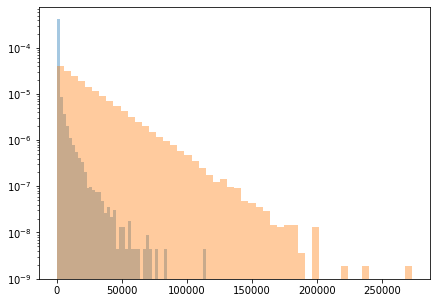

In [276]:
from scipy.stats import pareto, expon
fig, ax = plt.subplots(figsize=(7, 5))
# sns.distplot(wait_times.ravel(), fit=expon, kde=False, ax=ax, norm_hist=True)
ax.set_yscale('log')
for T in np.linspace(1e-1, 3e-1, 1):
    N = int(1e5)
    potentials = np.random.power(2, size=N)
    escape_rate = np.exp(-(1 - potentials) / T)
    wait_times = np.random.exponential(1 / escape_rate) # numpy does scale parameter instead of rate
    min_wait_times = np.random.exponential(1 / np.amin(escape_rate), size=N)
    sns.distplot(wait_times, kde=False, ax=ax, norm_hist=True)
    sns.distplot(min_wait_times, kde=False, ax=ax, norm_hist=True)
#     x = np.linspace(0.01, 1e5, 10000)
#     y = 2 * x ** -2
#     plt.plot(x, y)
# ax.set_xscale('log')

In [147]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
G1 = 1

f1 = lambda x, y, C1, phi: 2 * C1 * np.cos(phi - G1 * y) \
    + 4 * C1 * np.cos(G1 * y/2 + phi) * np.cos(np.sqrt(3)*G1 * x /2)

def Phi(C0, C1, phi):
    """
    Returns a function U(x, y) that evaluates to Phi(x, y; C0, C1, phi)
    Lattice constant defaults to graphene lattice constant in nanometers (nm)
    """
    return lambda x, y : C0 + f1(x, y, C1, phi)

# Define constants
M0, tau, D0, T0, T1, phi = 0.06975, 7, 3.46, -10.44, -58.87, 50.4 / 180 * np.pi
M = lambda x : -M0 * (1 + tau * x) * np.exp(-tau * x)
T = lambda x : T0 / (x ** 4 + T1)
W = lambda x : (1 + np.exp(-16 * (x - 4))) ** -1
C0 = lambda z : (M(z / D0 - 1) + (T(z) - M(z / D0 - 1)) * W(z))
z = 3.4 # Angstroms
C0 = C0(z)

a, b, z0  = 2.226, 3.295, 1.295
C1 = lambda z : a * np.exp(-b * (z - z0))
C1 = C1(z)

Uc = Phi(C0 / 2, C1, phi)
print("Moire lattice constant lm = {}".format(lm))
print("Moire reciprocaal lattice constant G1 = {}".format(G1))

Moire lattice constant lm = 55
Moire reciprocaal lattice constant G1 = 1


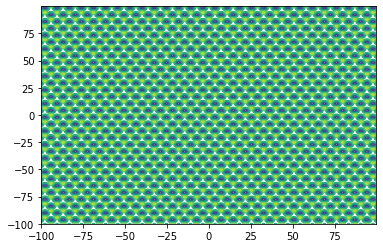

In [325]:
import seaborn as sns
delta = 0.1
x = np.arange(-100, 100, delta)
y = np.arange(-100, 100, delta)
X, Y = np.meshgrid(x, y)
Z = Uc(X, Y)
plt.contour(X, Y, Z)

In [330]:
np.exp(-(U_max - Z.ravel()) / 1e-3)

array([0.03117474, 0.02297431, 0.01687581, ..., 0.00022722, 0.00042803,
       0.00080473])

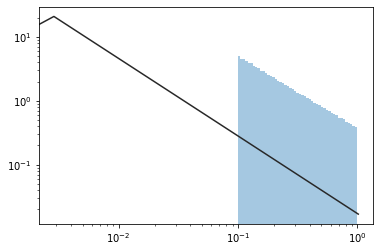

In [333]:
from scipy.stats import expon
ax = sns.distplot(np.exp(-(U_max - Z.ravel()) / 1e-3), kde=False, fit=pareto, bins=np.logspace(np.log10(0.1),np.log10(1.0), 50))
ax.set_yscale('log')
ax.set_xscale('log')

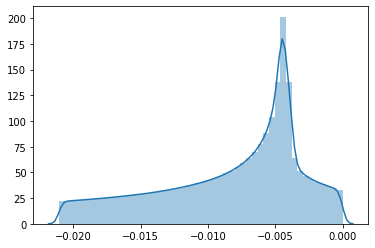

In [327]:
sns.distplot(-(U_max - Z.ravel()))